In [8]:
# # code to load individual files , combine them , remove columns we do not need and output them .  
# import pandas as pd 
# base_str = 'C:\\Users\\raosa\\Dropbox\\data\\combined\\'
# header_str = 'header_'
# transaction_str = 'transaction_'

# # head ={}
# # tran={}
# # df={}
# # for i in range(1,31):
# #     head[i]=pd.read_csv(str(base_str+header_str+str(i)+'.csv'))
# #     tran[i] = pd.read_csv(str(base_str+transaction_str+str(i)+'.csv'))
# #     print(i)
    
# # head_concat=[head[i] for i in range(1,31)]
# # tran_concat = [tran[i] for i in range(1,31)]
# # head=pd.concat(head_concat)
# # tran=pd.concat(tran_concat)
# for i in range(46,50):
#     tran = pd.read_csv(str(base_str+transaction_str+str(i)+'.csv'))
#     head=pd.read_csv(str(base_str+header_str+str(i)+'.csv'))
#     # remove zero transactions 
#     tran = tran.drop(tran[tran.block_hash == '0'].index)
#     # merge on block hash 
#     x=pd.merge(tran,head,left_on='block_hash',right_on='hash')
#     # drop unnecessary columns 
#     x=x.drop(['block_number', 'v','r','s','difficulty','extra_data','hash_y','logs_bloom','transactions_root','total_difficulty','mix_hash','state_root','parent_hash','sha3_uncles','size','receipts_root','nonce_y','transaction_index','nonce_x','gas_limit','hash_x'
#     ,'Unnamed: 0_y', 'Unnamed: 0_x','block_hash'], axis=1)

#     x.to_csv(str(str(i) + '.csv'),index=False)

In [2]:
# running smoothly upto block 4300000 , after that keep getting a memory error 
# running with blocks 0 - 4300000 . Have not understood how to get the other files using python
import pandas as pd 
base_str = 'C:\\Users\\raosa\\Dropbox\\data\\combined\\'
df = {}
for i in range(1,30):
    df[i] = pd.read_csv(str(base_str+str(i)+'.csv'))
data = [df[i] for i in range(1,30)]
x=pd.concat(data,ignore_index=True)
print('done')

done


In [4]:

# # this part of the code is not working , as I keep getting a memory error 
# import pandas as pd 
# base_str = 'C:\\Users\\raosa\\Dropbox\\data\\combined\\'
# df = {}
# for i in range(43,51):
#     df[i] = pd.read_csv(str(base_str+str(i)+'.csv'))
#     print(i)
# data1 = [df[i] for i in range(43,51)]

In [5]:
# import statements
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import time
import datetime

import torch
import torch.nn as nn
from torch.nn.functional import normalize  # noqa: F401
import torch.nn.functional as F

from torch.autograd import Variable

import pyro
from pyro.distributions import Normal, Bernoulli  # noqa: F401
from pyro.infer import SVI
from pyro.optim import Adam

pyro.get_param_store().clear()

# set copy warning error to none . Warns by default . 
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
# data - the pricing data . head - header info of a part of a block . tran - transaction info of a part of a block
data = pd.read_csv('C:\\Users\\raosa\\Dropbox\\dl-graph\\data\\eth\\pricing\\final.csv')

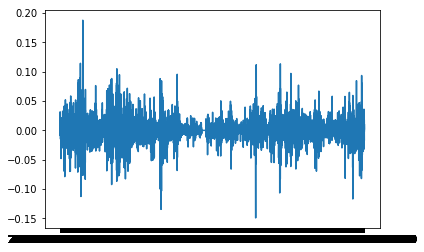

In [7]:
# take a subset of the pricing data and plot the date vs log return 

data1= data

x_axis_plot=data1['Date']
y_axis_plot=data1['log_ret']
plt.plot(x_axis_plot,y_axis_plot)
plt.show()

### Pre processing the transaction and header information 

In [8]:
# # remove zero transactions 
# tran = tran.drop(tran[tran.block_hash == '0'].index)
# # merge on block hash 
# x=pd.merge(tran,head,left_on='block_hash',right_on='hash')
# # drop unnecessary columns 
# x=x.drop(['block_number', 'v','r','s','difficulty','extra_data','hash_y','logs_bloom','transactions_root','total_difficulty','mix_hash','state_root','parent_hash','sha3_uncles','size','receipts_root','nonce_y','transaction_index','nonce_x','gas_limit','hash_x'
#         ], axis=1)

# # columns being kept 
# # gas_used
# # timestamp
# # block_hash
# # from
# # gas
# # miner
# # value
# # to
# # input
# # gasprice
# test1  = int(str(x['timestamp'][3]),16)
# test2 = datetime.datetime.fromtimestamp(test1)



In [ ]:
# convert from hex to dec 
for i in range(0,len(x)):
    x['timestamp'][i] = int(str(x['timestamp'][i]),16)
    x['timestamp'][i] = datetime.datetime.fromtimestamp(x['timestamp'][i])

for i in range(0,len(x)):
    x['value'][i] = int(x['value'][i],16)

x['timestamp'] = pd.to_datetime(x['timestamp'])

In [ ]:
# group by the number of transactions per hour 
tran_counts = x.groupby([pd.Grouper(key='timestamp',freq='H')]).size().reset_index(name='count')

In [ ]:
# convert to datetime object 
data1['Date'] = pd.to_datetime(data1['Date'])

# merge both datasets 
y=pd.merge(tran_counts,data1,left_on='timestamp',right_on='Date')

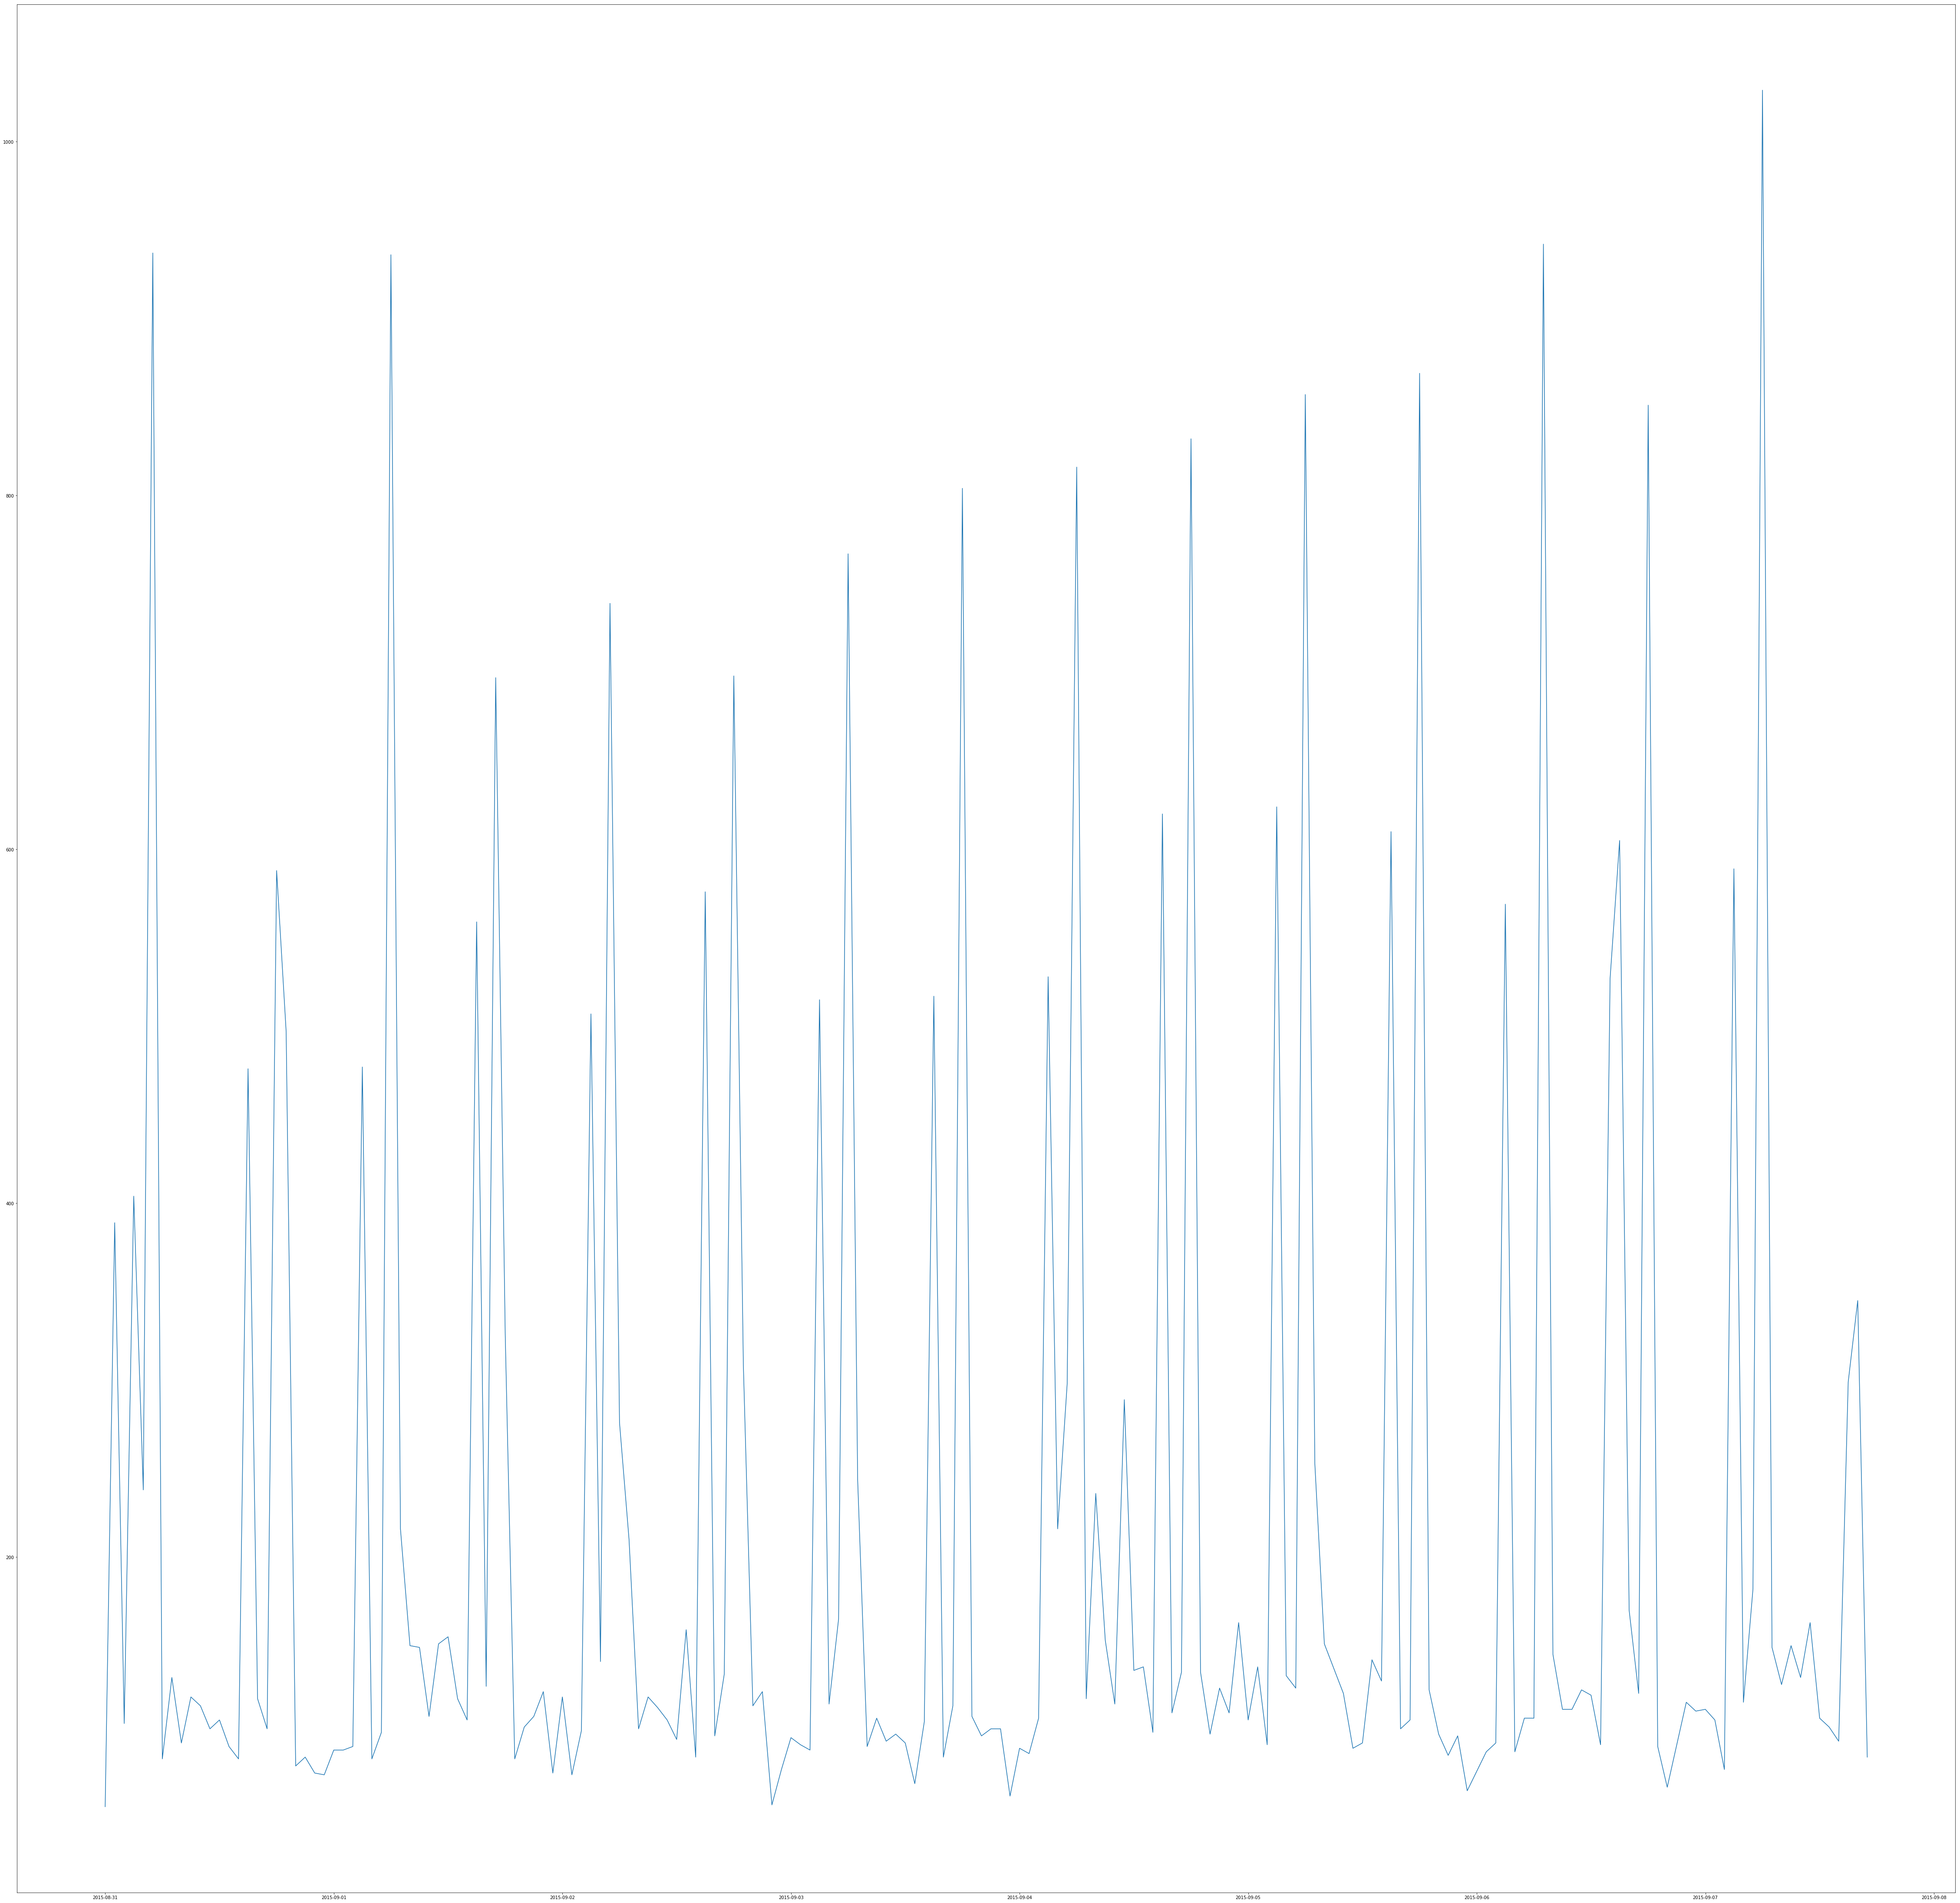

In [8]:
xaxis=y['timestamp']
yaxis=y['count']
plt.figure(figsize=(50,50))
plt.plot(xaxis,yaxis)
# fig.set_size_inches(18.5, 10.5)
plt.savefig('foo.png')
plt.show()

In [9]:
# df=nx.from_pandas_dataframe(tran,'from','to')
# Adjtraining = nx.adjacency_matrix(df)
# adj = Adjtraining.todense()
# x=pd.DataFrame(adj)

#np.savetxt("foo.csv",Adjtraining , delimiter=",")

# nx.draw_networkx(df,with_labels=False, node_size=30)





# df = pd.crosstab(tran['from'], tran['to'])
# idx = df.columns.union(df.index)
# df = df.reindex(index = idx, columns=idx, fill_value=0)

In [10]:
y=y.drop(['timestamp','pct_change'],axis=1)
 
# this is the dataset that I am using for the medium post code 

In [11]:
data = y
data = data[::-1]

In [12]:
data.head()

,count,Date,Close Price,log_ret
185,87,2015-09-07 17:00:00,1.220833,-0.023610
184,345,2015-09-07 16:00:00,1.250000,-0.016529
183,299,2015-09-07 15:00:00,1.270833,0.032659
182,96,2015-09-07 14:00:00,1.230000,-0.010111
181,104,2015-09-07 13:00:00,1.242500,-0.029735


In [13]:
N = 72

count = pd.to_numeric(data.ix[:, 'count'][-N:])
close_price = pd.to_numeric(data.ix[:, 'Close Price'][-N:])
log_ret = pd.to_numeric(data.ix[:, 'log_ret'][-N:])


count = count.pct_change().replace(np.nan, 0).replace(np.inf, 0)
close_price = close_price.pct_change().replace(np.nan, 0).replace(np.inf, 0)
log_ret = log_ret.pct_change().replace(np.nan, 0).replace(np.inf, 0)


count = np.array(count)
close_price = np.array(close_price)
log_ret = np.array(log_ret)


C:\Users\raosa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
WINDOW = 7
STEP = 1
FORECAST = 1

X, Y = [], []
for i in range(0, len(count), STEP): 
    try:
        c = count[i:i+WINDOW]
        p = close_price[i:i+WINDOW]
        l = log_ret[i:i+WINDOW]
                
#         y_i = (normal_close[i+WINDOW+FORECAST] - normal_close[i+WINDOW]) / normal_close[i+WINDOW]
        y_i = close_price[i+WINDOW+FORECAST]
        x_i = np.column_stack((c,p,l))
        x_i = x_i.flatten()

    except Exception as e:
        break

    X.append(x_i)
    Y.append(y_i)

X, Y = np.array(X), np.array(Y)

# from numpy import inf
# X[X == -inf] = 0

# remove infinity values 
X[np.isneginf(X)] = 0


False
False
False
False


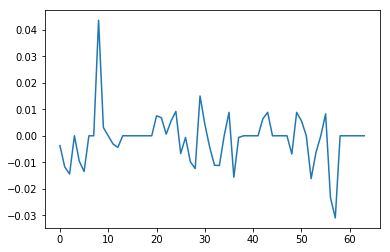

In [15]:
# check if we have any nulls or infinity terms 
print(np.isinf(X).any())
print(np.isinf(Y).any())
print(np.isnan(X).any())
print(np.isnan(Y).any())
plt.figure()
plt.plot(Y)
plt.show()

In [16]:
import torch
import torch.nn as nn
from torch.nn.functional import normalize  # noqa: F401
import torch.nn.functional as F

from torch.autograd import Variable

import pyro
from pyro.distributions import Normal, Bernoulli  # noqa: F401
from pyro.infer import SVI
from pyro.optim import Adam

pyro.get_param_store().clear()

In [17]:
X_train, Y_train = Variable(torch.Tensor(X[:-30])), Variable(torch.Tensor(Y[:-30]))
X_test, Y_test = Variable(torch.Tensor(X[-30:])), Variable(torch.Tensor(Y[-30:]))
data = torch.cat((X_train, Y_train), 1)

In [18]:
# get array of batch indices
def get_batch_indices(N, batch_size):
    all_batches = np.arange(0, N, batch_size)
    if all_batches[-1] != N:
        all_batches = list(all_batches) + [N]
    return all_batches

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, 1)   # output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.predict(x)
        return x

first_layer = len(X_train.data.numpy()[0])
second_layer = 10   
    
softplus = nn.Softplus()
regression_model = Net(first_layer, second_layer)

In [19]:
def model(data):

    mu = Variable(torch.zeros(second_layer, first_layer)).type_as(data)
    sigma = Variable(torch.ones(second_layer, first_layer)).type_as(data)
    bias_mu = Variable(torch.zeros(second_layer)).type_as(data)
    bias_sigma = Variable(torch.ones(second_layer)).type_as(data)
    w_prior, b_prior = Normal(mu, sigma), Normal(bias_mu, bias_sigma)
    
    mu2 = Variable(torch.zeros(1, second_layer)).type_as(data)
    sigma2 = Variable(torch.ones(1, second_layer)).type_as(data)
    bias_mu2 = Variable(torch.zeros(1)).type_as(data)
    bias_sigma2 = Variable(torch.ones(1)).type_as(data)
    w_prior2, b_prior2 = Normal(mu2, sigma2), Normal(bias_mu2, bias_sigma2)    
    
    priors = {'hidden.weight': w_prior, 
              'hidden.bias': b_prior,
              'predict.weight': w_prior2,
              'predict.bias': b_prior2}
    
    # lift module parameters to random variables sampled from the priors
    lifted_module = pyro.random_module("module", regression_model, priors)
    # sample a regressor (which also samples w and b)
    lifted_reg_model = lifted_module()

    with pyro.iarange("map", N, subsample=data):
        x_data = data[:, :-1]
        y_data = data[:, -1]
        # run the regressor forward conditioned on inputs
        prediction_mean = lifted_reg_model(x_data).squeeze()
        pyro.sample("obs",
                    Normal(prediction_mean, Variable(torch.ones(data.size(0))).type_as(data)),
                    obs=y_data.squeeze())

In [20]:
def guide(data):
    
    w_mu = Variable(torch.randn(second_layer, first_layer).type_as(data.data), requires_grad=True)
    w_log_sig = Variable((torch.ones(second_layer, first_layer) + 0.05 * torch.randn(second_layer, first_layer)).type_as(data.data), requires_grad=True)
    b_mu = Variable(torch.randn(second_layer).type_as(data.data), requires_grad=True)
    b_log_sig = Variable((torch.ones(second_layer) + 0.05 * torch.randn(second_layer)).type_as(data.data), requires_grad=True)
    
    # register learnable params in the param store
    mw_param = pyro.param("guide_mean_weight", w_mu)
    sw_param = softplus(pyro.param("guide_log_sigma_weight", w_log_sig))
    mb_param = pyro.param("guide_mean_bias", b_mu)
    sb_param = softplus(pyro.param("guide_log_sigma_bias", b_log_sig))
    
    # gaussian guide distributions for w and b
    w_dist = Normal(mw_param, sw_param)
    b_dist = Normal(mb_param, sb_param)
    
#     w_mu2 = Variable(torch.randn(1, second_layer).type_as(data.data), requires_grad=True)
#     w_log_sig2 = Variable(torch.randn(1, second_layer).type_as(data.data), requires_grad=True)
#     b_mu2 = Variable(torch.randn(1).type_as(data.data), requires_grad=True)
#     b_log_sig2 = Variable(torch.randn(1).type_as(data.data), requires_grad=True)
    
    w_mu2 = Variable(torch.randn(1, second_layer).type_as(data.data), requires_grad=True)
    w_log_sig2 = Variable((torch.ones(1, second_layer) + 0.05 * torch.randn(1, second_layer)).type_as(data.data), requires_grad=True)
    b_mu2 = Variable(torch.randn(1).type_as(data.data), requires_grad=True)
    b_log_sig2 = Variable((torch.ones(1) + 0.05 * torch.randn(1)).type_as(data.data), requires_grad=True)
    
    
    
    # register learnable params in the param store
    mw_param2 = pyro.param("guide_mean_weight2", w_mu2)
    sw_param2 = softplus(pyro.param("guide_log_sigma_weight2", w_log_sig2))
    mb_param2 = pyro.param("guide_mean_bias2", b_mu2)
    sb_param2 = softplus(pyro.param("guide_log_sigma_bias2", b_log_sig2))
    
    # gaussian guide distributions for w and b
    w_dist2 = Normal(mw_param2, sw_param2)
    b_dist2 = Normal(mb_param2, sb_param2)
      
    dists = {'hidden.weight': w_dist, 
              'hidden.bias': b_dist,
              'predict.weight': w_dist2,
              'predict.bias': b_dist2}
    
    # overloading the parameters in the module with random samples from the guide distributions
    lifted_module = pyro.random_module("module", regression_model, dists)
    # sample a regressor
    return lifted_module()

In [21]:
model(data)
guide(data)

C:\Users\raosa\Anaconda3\lib\site-packages\pyro\__init__.py:57: RuntimeWarning: trying to observe a value outside of inference at obs
  RuntimeWarning)


Net(
  (hidden): Linear(in_features=21, out_features=10)
  (predict): Linear(in_features=10, out_features=1)
)

In [22]:
# instantiate optim and inference objects
optim = Adam({"lr": 0.001})
svi = SVI(model, guide, optim, loss="ELBO")

N = len(X_train.data.numpy())


for j in range(10000):
    epoch_loss = 0.0
    perm = torch.randperm(N)
    # shuffle data
    data = data[perm]
    # get indices of each batch
    all_batches = get_batch_indices(N, 5)
    for ix, batch_start in enumerate(all_batches[:-1]):
        batch_end = all_batches[ix + 1]
        batch_data = data[batch_start: batch_end]        
        epoch_loss += svi.step(batch_data)
    if j % 100 == 0:
        print("epoch avg loss {}".format(epoch_loss/float(N)))

epoch avg loss 5960.923196231618
epoch avg loss 9786.677590762867
epoch avg loss 6053.957749310662
epoch avg loss 5700.552849264706
epoch avg loss 6119.362800149356
epoch avg loss 4816.136977251838
epoch avg loss 2814.81566844267
epoch avg loss 2482.585783116958
epoch avg loss 2224.3537777171414
epoch avg loss 2858.7302910299863
epoch avg loss 788.2724510641659
epoch avg loss 953.3839515237247
epoch avg loss 965.9256591796875
epoch avg loss 1158.609707103056
epoch avg loss 196.38209264418657
epoch avg loss 169.82980346679688
epoch avg loss 531.6970416798312
epoch avg loss 163.10694481344785
epoch avg loss 114.86482822193818
epoch avg loss 197.656821307014
epoch avg loss 75.02171101289638
epoch avg loss 62.82463612275965
epoch avg loss 75.81753674675437
epoch avg loss 38.36397866641774
epoch avg loss 45.4678492826574
epoch avg loss 46.40455358168658
epoch avg loss 33.91733932495117
epoch avg loss 42.59181303136489
epoch avg loss 21.92878588508157
epoch avg loss 23.99114922916188
epoch a

In [23]:
y_preds = Variable(torch.zeros(30, 1))
for i in range(100):
    sampled_reg_model = guide(X_test)
    # run the regression model and add prediction to total
    y_preds = y_preds + sampled_reg_model(X_test)
# take the average of the predictions
y_preds = y_preds / 100

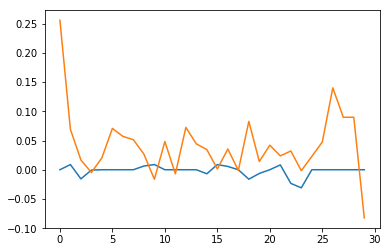

In [24]:
plt.figure()
plt.plot(Y_test.data.numpy())
plt.plot(y_preds.data.numpy())
plt.show()

In [25]:

import networkx as nx

G = x 
G=G.drop(['Unnamed: 0_x','block_hash','gas','gasprice','input','Unnamed: 0_y','gas_used','miner','number','number',], axis=1)

# df=nx.from_pandas_dataframe(G,'from','to')
# # Adjtraining = nx.adjacency_matrix(df)
# # adj = Adjtraining.todense()
# # x=pd.DataFrame(adj)



G['value'] = G['value']/1000000000000000

# G = pd.crosstab(G['to'], G['from'],G['value'],aggfunc = sum)
# idx = G.columns.union(G.index)
# G = G.reindex(index = idx, columns=idx, fill_value=0)

In [26]:
# code that will be used to visualize the network 
# https://github.com/graphistry/pygraphistry#demo-of-friendship-communities-on-facebook

hour_tranlist = G[(G['timestamp'] > '2015-08-17 04:00:00') & (G['timestamp'] < '2015-08-17 05:00:00')]


In [27]:
G.head()

,from,to,value,timestamp
0,0xcf00a85f3826941e7a25bfcf9aac575d40410852,0xd9666150a9da92d9108198a4072970805a8b3428,5000,2015-08-17 04:12:48
1,0x790b8a3ce86e707ed0ed32bf89b3269692a23cc1,0x4d67f4f0db45b3b5a3424b39ed8d972f710381d5,58900,2015-08-17 04:13:39
2,0x007f7f58d3eb5b7510a301ecc749fc1fcddbe14d,0xb1abce2918e21ddb93aa452731a12672a3d9f75a,5000,2015-08-17 04:15:14
3,0xc47aaa860008be6f65b58c6c6e02a84e666efe31,0xee097ff2d75523c83b4b1320479900c33bf22cc0,1000,2015-08-17 04:15:14
4,0xad8c7fbfabc46c35adb03f7b3a67e731e5793899,0x32be343b94f860124dc4fee278fdcbd38c102d88,6377.65,2015-08-17 04:15:42


In [28]:
hour_tranlist.head()

,from,to,value,timestamp
0,0xcf00a85f3826941e7a25bfcf9aac575d40410852,0xd9666150a9da92d9108198a4072970805a8b3428,5000,2015-08-17 04:12:48
1,0x790b8a3ce86e707ed0ed32bf89b3269692a23cc1,0x4d67f4f0db45b3b5a3424b39ed8d972f710381d5,58900,2015-08-17 04:13:39
2,0x007f7f58d3eb5b7510a301ecc749fc1fcddbe14d,0xb1abce2918e21ddb93aa452731a12672a3d9f75a,5000,2015-08-17 04:15:14
3,0xc47aaa860008be6f65b58c6c6e02a84e666efe31,0xee097ff2d75523c83b4b1320479900c33bf22cc0,1000,2015-08-17 04:15:14
4,0xad8c7fbfabc46c35adb03f7b3a67e731e5793899,0x32be343b94f860124dc4fee278fdcbd38c102d88,6377.65,2015-08-17 04:15:42


In [29]:
# approach 1 : get the data into a graph structure in networkx , and then get graph statistics for it . 
list1 = hour_tranlist['from']
list2 = hour_tranlist['to']
nodes = list(set(list1 + list2))
G1 = nx.Graph()
G1.add_nodes_from(nodes)
G1.add_edges_from(list(zip(list1,list2)),weight=G['value'])
nx.info(G1)

'Name: \nType: Graph\nNumber of nodes: 221\nNumber of edges: 103\nAverage degree:   0.9321'

In [30]:
# approach 2 : do pd.crosstab with weights so you have an adjacency matrix 
# then from the adjacency matrix , you use Truncated SVD for dimensionality reduction. 
# that reduces number of columns 
# then transform the output and repeat the process . 
# once we have the matrix as a representation of a size that we are comfortable with , then flatten it into a list. 
# append the elements of the list 

df = pd.crosstab(hour_tranlist['from'], hour_tranlist['to'], hour_tranlist['value'], aggfunc=sum)
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)
df = df.fillna(0)
df.head()

,0x007f7f58d3eb5b7510a301ecc749fc1fcddbe14d,0x014e478251f22a79fa7014f285647d91462a9669,0x027698b61229ecca19311e977ade3c2923d4e414,0x051b69bb7073f7385370c5751f988b31a7567a63,0x0617194e49baad419b57fb8ebba265e417362835,0x06bcfdb20583cc822f2031724e36f3678bbca6e9,0x0a856cdc3eafbad120c51220d0f71d4aa2dee7ae,0x0c9a9e318c2fbf98388ccc81141392c066fbbc19,0x0f87fb507513e749081e34373c84e95e85b5c057,0x1151790fe5f7c3113dfb07dc3914b1916ecc8a7a,...,0xe7dadedf7cebaaba85903823d254601b1d459c9b,0xea4933866ad977ce24bbb244ecc2c79463454fe4,0xee097ff2d75523c83b4b1320479900c33bf22cc0,0xf03462ec92ad7d5f732197d6f2408c5b2cd44361,0xf0c896db24137eda6ec88cf1a95217f8604ae55e,0xf29a3dc6237af30ed75641f05b28d12668f69268,0xf2d2aff1320476cb8c6b607199d23175cc595693,0xfd7c9117bbeb649d9b37b3d3c9917f7c12f526b3,0xfd844aefb4b317e14c180d882bb0799dd7fa5ccb,0xfe8635c30d5b0a49d09fc9480d59e05d7450fd41
0x007f7f58d3eb5b7510a301ecc749fc1fcddbe14d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x014e478251f22a79fa7014f285647d91462a9669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x027698b61229ecca19311e977ade3c2923d4e414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x051b69bb7073f7385370c5751f988b31a7567a63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x0617194e49baad419b57fb8ebba265e417362835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4425.156939,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:

from sklearn.decomposition import TruncatedSVD

n_components=5
pca = TruncatedSVD(n_components)
matrix_reduced = pca.fit_transform(df)

In [32]:
test1 = pd.DataFrame(matrix_reduced)
test1.head()

,0,1,2,3,4
0,5.514507e-09,-1.259738e-16,-7.144046e-15,-1.767855e-10,2.132661e-07
1,3.245000e-20,1.360306e-13,-7.578841e-12,3.527011e-20,-1.680619e-19
2,-4.490117e-29,3.957201e-28,7.154298e-25,3.404838e-18,-1.423080e-17
3,-3.325730e-31,2.213458e-25,1.955763e-23,2.133175e-16,4.971291e-14
4,-4.528318e-14,-8.878995e-23,8.237190e-20,1.233473e-13,-8.302622e-11


In [33]:
list_rep = test1.values.flatten()
len(list_rep)


590

In [34]:
# try different dimensionality reduction options . 
# first reduce number of columns 
from sklearn.decomposition import PCA
n_components1=5
pca1 = PCA(n_components1)
matrix_reduced1 = pca.fit_transform(df)
test2 = pd.DataFrame(matrix_reduced1)

# then transform operation 
test2 = test2.T


pca1 = PCA(n_components1)
matrix_reduced1 = pca.fit_transform(test2)
test2 = pd.DataFrame(matrix_reduced1)
test2

,0,1,2,3,4
0,15000000.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
1,0.0,3.124306e+06,-9.085260e-12,-3.184512e-15,-6.664969e-15
2,-0.0,1.761437e-11,2.057044e+06,3.559728e-12,3.915350e-12
3,-0.0,3.563355e-15,1.267289e-13,4.754664e+05,-5.930454e-10
4,-0.0,-3.872332e-15,-1.736118e-11,1.389146e-09,2.200023e+05


In [35]:

list_rep1 = test2.values.flatten()
len(list_rep1)
# list1 = G['from']
# list2 = G['to']
# nodes = list(set(list1 + list2))
# edges = list(list1,list2)


25

In [38]:
# nx.adjacency_spectrum(G1, weight='value')
# nx.linalg.spectrum(G1,weight='value')
# G1 = nx.Graph()
# G1.add_nodes_from(nodes)
# G1.add_edges_from(list(zip(list1,list2)),weight=G['value'])

TypeError: 'module' object is not callable

In [77]:
# nx.connected_components(G1)
# nx.clustering(G1)
# nx.degree(G1)
# print(nx.to_scipy_sparse_matrix(G1))
# G1.degree()

In [43]:
# A1 = nx.adjacency_matrix(G1)
# print(A1.todense())
# # A1.setdiag(A1.diagonal()*2)
# # print(A1.todense())
# # dataf1=nx.to_scipy_sparse_matrix(G1)

In [42]:
# nx.draw_networkx(G1,with_labels=False)

In [104]:
attrmat1 = nx.attr_matrix(G1)

In [106]:
b = np.array(attrmat1[0])

In [108]:
b=b.reshape(-1)

In [112]:
b=b.ravel()